# Иерархический кластерный анализ

Определить число кластеров и обосновать свой выбор.

Разбить объекты на кластеры. Предложить и обосновать интерпретацию кластеров.


In [64]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os


In [65]:
os.chdir("C:\\Users\\Админ\\Lect_04\\задача_1_леденцы")

In [66]:
df = pd.read_csv("Леденцы.dat", sep=";")

Выведем на экран:


In [67]:
print(df)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]


Данные равнозначны, поэтому нормализовать не надо.

Сначала воспользуемся методом Варда:

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [69]:
link = linkage(df, 'ward', 'euclidean')

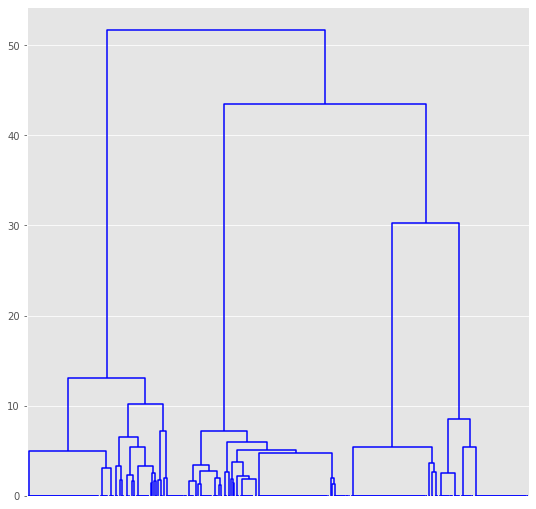

In [70]:
fig = plt.figure(figsize=(9,9))

# строим соответствующую дендрограмму
dn = dendrogram(link, color_threshold = -1, no_labels = True) 

Явный скачок на уровне примерно двадцати. Тут получается 4 кластера. Однако если разрезать на 12-ти, то получится 5 кластеров.

Давайте сначала разделим на 4 кластера.


Воспользуемся каменистой осыпью, чтобы понять, какое разбиение на кластеры имеет смысл.

Text(310, 12.5, '5 clusters')

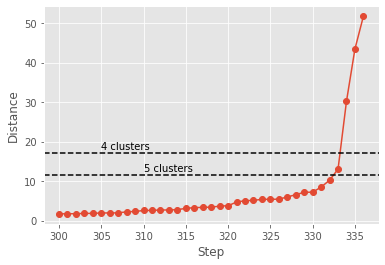

In [72]:
dist = link[300:, 2]
dist_rev = dist[::]
idxs = range(300, len(dist) + 300)
plt.plot(idxs, dist_rev, marker = 'o')
plt.xlabel('Step')
plt.ylabel('Distance')

plt.axhline(17, c = 'k', linestyle = 'dashed')
plt.text(305, 18, '4 clusters')

plt.axhline(11.5, c = 'k', linestyle = 'dashed')
plt.text(310, 12.5, '5 clusters')

Получили что на момент пяти кластеров, излом получается не очень сильным.

Разберем случай 4 кластеров

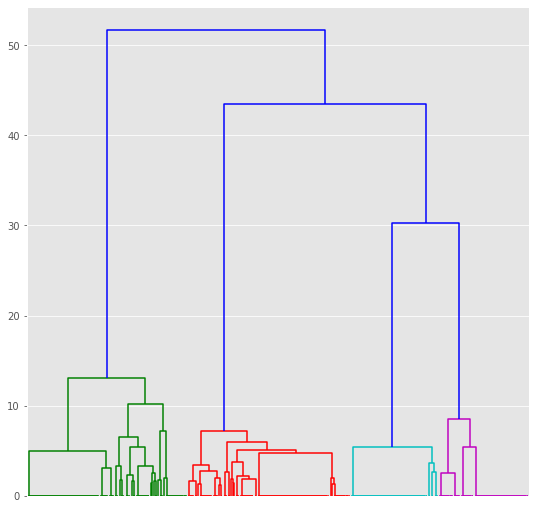

In [73]:
# разрезаем на высоте 20 -- 4 кластера

fig = plt.figure(figsize=(9,9))
dn = dendrogram(link, color_threshold = 20,no_labels = True)

In [74]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [75]:
#Посчитаем, сколько элементов попало в каждый кластер
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

В каждом кластере достаточно элементов, чтобы интерпретировать результат.

In [76]:
#  Средние значения характеристик в каждом кластере
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Интерпретация:


В первый кластер попадают люди, которые в основном пользуются леденцами для облегчения боли в горле, избавления заложенности носа и улучшения самочувствия. То есть в первый кластер попадают болезненные люди, которым нужны леденца в большей степени в медицинских целях.



Во второй кластер попадают люди, которые используют леденцы в случаях V1-V4, то есть для освежения дыхания и поднятия самооценки 


В третьем кластере люди, которым нужны леденцы для концентрации и чтобы отвлечься и подумать. Возможно у них нервная работа и проблема с мотивацией.


В четвертом кластере находятся сладкоежки.

Если разбивать на 5 кластеров:

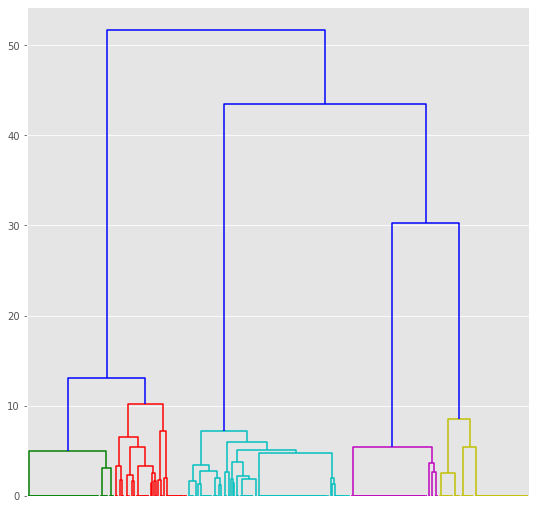

In [77]:
# разрезаем на высоте 12 -- 5 кластеров

fig = plt.figure(figsize=(9,9))
dn = dendrogram(link, color_threshold = 12,no_labels = True)

In [78]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 5, criterion='maxclust')

In [80]:
#Посчитаем, сколько элементов попало в каждый кластер
df.groupby('cluster').size()

cluster
1     59
2     49
3    110
4     59
5     61
dtype: int64

В каждом кластере достаточно элементов.

In [81]:
#  Средние значения характеристик в каждом кластере
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.932203,4.830508,4.898305
2,2.612245,2.632653,2.489796,2.163265,2.142857,2.081633,2.448980,2.816327,4.979592,4.795918,4.816327
3,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
5,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


В принципе здесь 3, 4, и 5 кластеры можно охарактеризовать как в прошлом случае 2, 3 и 4 кластеры соответственно

Что происходит с 1 и 2 кластером. Как мы уже поняли, если разрезать выше, то эти два кластера склеиваются в один, в котором люди используют леденцы в медецинских целях. В нашем случае признаки V9, V10, V11 почти не отличаются и они, однако по признакам V1-V8 люди из второго кластера ставили в среднем оценки ниже чем в первом по каждому параметру. То есть люди, попадающие во второй кластер почти всегда пользуются леденцами исключительно в медицинских целях. Люди из первого кластера используют леденцы в основном для лечения, но также могут использовать их в дргуих случаях. Но в целом 1 и 2 кластер не сильно отличаются и разбиение на 4 кластера выглядит более осмысленным.

Проведем кластеризацию по методу ближайего соседа.В качетсве метрики возьмем Манхэттенскую.

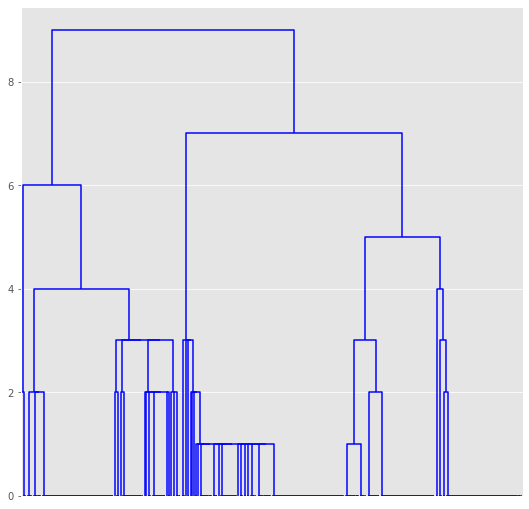

In [82]:
link = linkage(df, 'single', 'cityblock')

fig = plt.figure(figsize=(9,9))

# строим соответствующую дендрограмму
dn = dendrogram(link, color_threshold = -1, no_labels = True)  

Построим каменистую осыпь

Text(317, 3.8, '7 clusters')

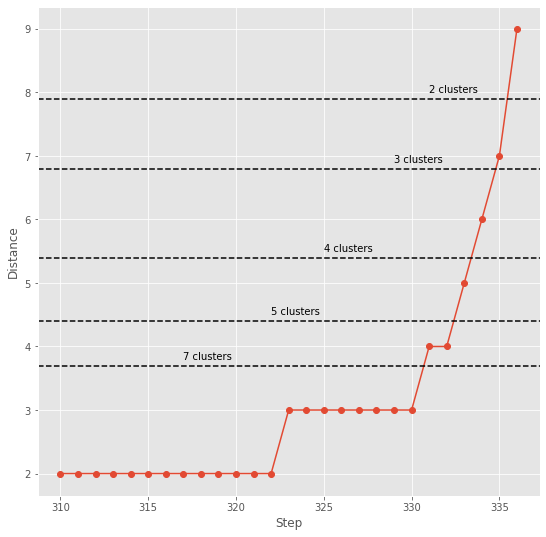

In [83]:
fig = plt.figure(figsize=(9,9))

dist = link[310:, 2]
dist_rev = dist[::]
idxs = range(310, len(dist) + 310)
plt.plot(idxs, dist_rev, marker = 'o')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(5.4, c = 'k', linestyle = 'dashed')
plt.text(325, 5.5, '4 clusters')
plt.axhline(6.8, c = 'k', linestyle = 'dashed')
plt.text(329, 6.9, '3 clusters')
plt.axhline(4.4, c = 'k', linestyle = 'dashed')
plt.text(322, 4.5, '5 clusters')
plt.axhline(7.9, c = 'k', linestyle = 'dashed')
plt.text(331, 8, '2 clusters')
plt.axhline(3.7, c = 'k', linestyle = 'dashed')
plt.text(317, 3.8, '7 clusters')

Посмотрим на разбиение на 5 кластеров.

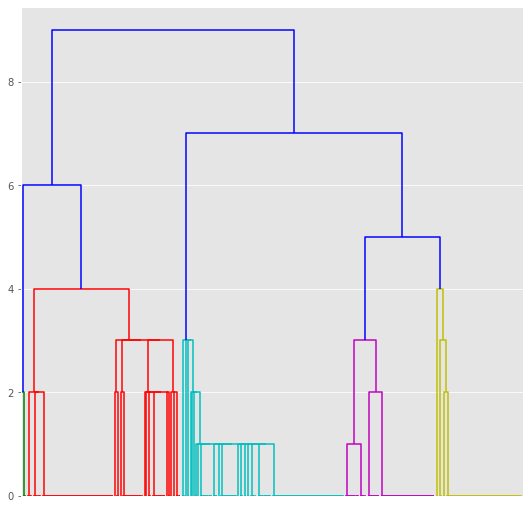

In [84]:
fig = plt.figure(figsize=(9,9))
dn = dendrogram(link, color_threshold = 4.3,no_labels = True)

In [85]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 5, criterion='maxclust')

In [86]:
#Посчитаем, сколько элементов попало в каждый кластер
df.groupby('cluster').size()

cluster
1      4
2    104
3    110
4     61
5     59
dtype: int64

В первый кластер попало слишком мало элементов, поэтому не получится интерпретировать результат.

Если будем разбивать на 7 кластеров, то понятно что в первом кластере опять будет очень мало объектов, поэтому тоже не подходит.



То же самое если разбивать на 4 кластера. Попробуем разбить на три.

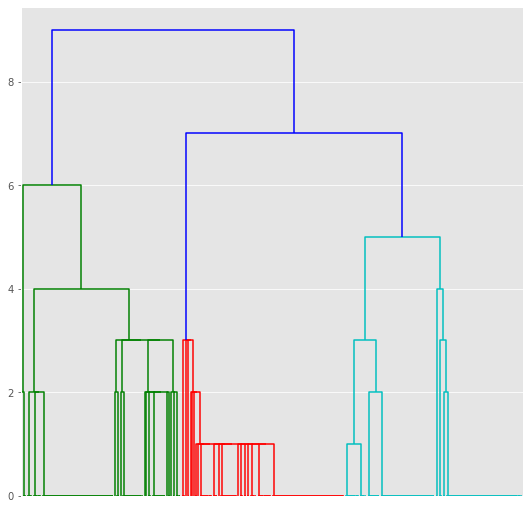

In [87]:
fig = plt.figure(figsize=(9,9))
dn = dendrogram(link, color_threshold = 6.5 ,no_labels = True)

In [88]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 3, criterion='maxclust')


In [89]:
#Посчитаем, сколько элементов попало в каждый кластер
df.groupby('cluster').size()

cluster
1    108
2    110
3    120
dtype: int64

In [90]:
#  Средние значения характеристик в каждом кластере
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000


Эта кластеризация неплохо описывает первый кластер, в который очевидно входят люди которые в основном покупают леденцы для лечения. Во второй класс попадают те, кто пытается избавиться от запаха изо рта. В третий класс вроде входят любители сладостей и подумать, но оценки небольшие.


В итоге получили, что метод ближайшего соседа не очень работает на наших данных. Поэтому лучше всего брать кластеризацию по методу Варда и разбивать на 4 кластера.